In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used


from keras.utils import np_utils                         # NumPy related tools
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline


np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import itertools

#Setting the Theme of the data visualizer Seaborn
sns.set(style="white",context="notebook",palette="deep")

#Tensorflow Version
print("Tensorflow Version:"+tf.version.VERSION)
print("Keras Version      "+tf.keras.__version__)

Tensorflow Version:2.6.0
Keras Version      2.6.0


load and upload data

In [ ]:
!pip3 install pickle5
import pickle5 as pickle
with open('x-test.pickle', 'rb') as handle:
  x_test = pickle.load(handle)
with open('y-test.pickle', 'rb') as handle:
  y_test = pickle.load(handle)
with open('x-train.pickle', 'rb') as handle:
  x_train = pickle.load(handle)
with open('y-train.pickle', 'rb') as handle:
  y_train = pickle.load(handle)

print(y_test.shape, y_train.shape)

     |████████████████████████████████| 132 kB 5.2 MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219336 sha256=560d278850c78c5d0f640cc50314f8709de3b957d11036b3c461d2f699f29b27
  Stored in directory: /root/.cache/pip/wheels/7e/6a/00/67136a90d6aca437d806d1d3cedf98106e840c97a3e5188198
Successfully built pickle5
(529,) (1564,)


shuffle data

In [ ]:
def unison_shuffled_copies_2( a , b):
  assert len(a) == len(b)
  p = np.random.permutation(len(a))
  return a[p], b[p]

In [ ]:
x_train , y_train = unison_shuffled_copies_2(x_train , y_train)
x_test , y_test = unison_shuffled_copies_2(x_test , y_test)

In [ ]:
x_train , y_train= shuffle(x_train , y_train)
x_test , y_test= shuffle(x_test , y_test)

preprocessing data
-rubah bentuk dimensi data x
-rubah data kelas menjadi one-hot

In [ ]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(1564, 1, 64, 64) (1564,)
(529, 1, 64, 64) (529,)


In [ ]:
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

In [ ]:
print(y_train[0])

8


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=23)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=23)

In [ ]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(1564, 64, 64, 1) (1564, 23)
(529, 64, 64, 1) (529, 23)


8


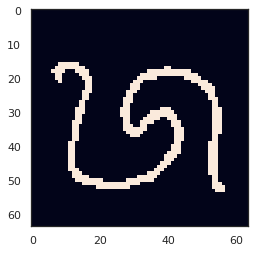

9


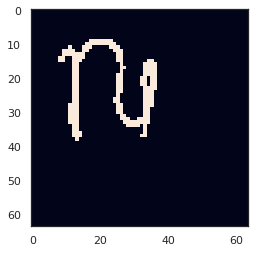

10


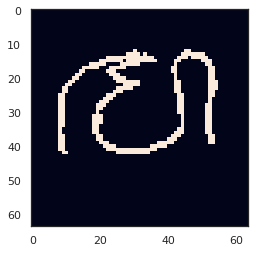

8


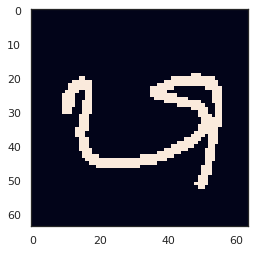

20


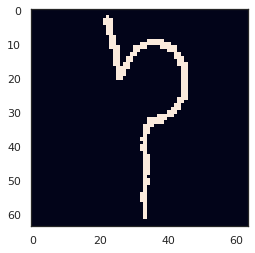

12


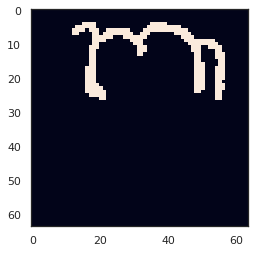

4


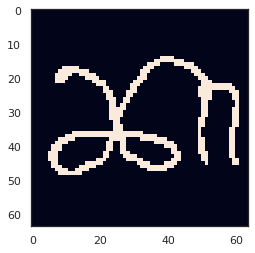

13


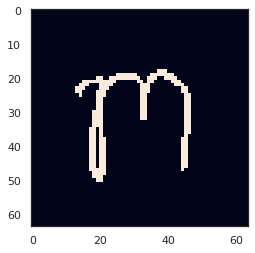

8


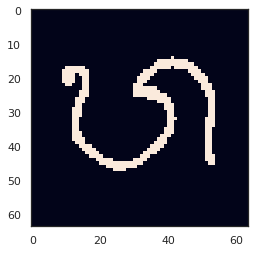

20


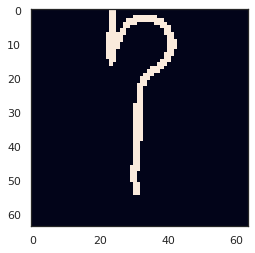

5


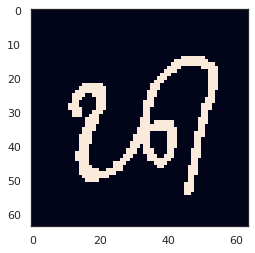

7


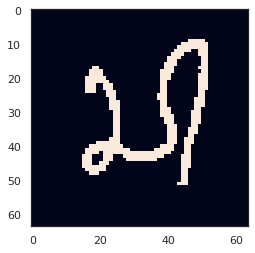

18


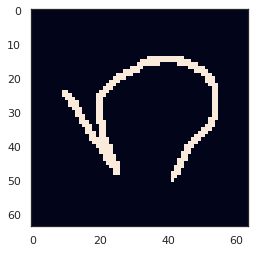

11


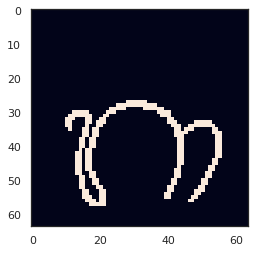

4


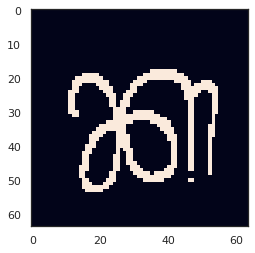

20


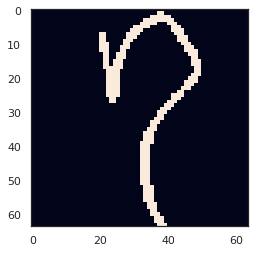

4


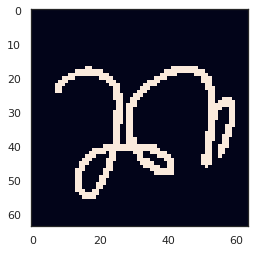

5


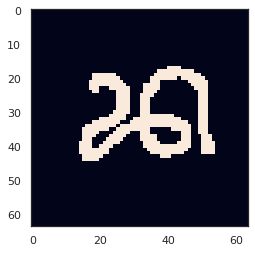

16


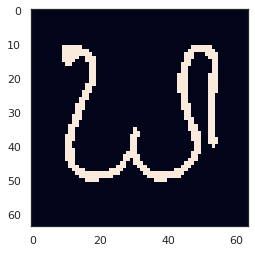

In [ ]:
for x in range(0, 1500, 80):
  print(np.argmax(y_train[x]))
  plt.imshow(x_train[x,:,:,0])
  plt.show()

model CNN

In [ ]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (64,64,1)))

model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))

model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(8192,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(4096,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(23,activation=tf.nn.softmax))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, epsilon=1e-08, decay=0.0)

In [ ]:
model.compile(optimizer = optimizer, loss='categorical_crossentropy', 
             metrics=["accuracy"])  

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)
epochs=100
batch_size = 32

data generator

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
type(x_train), type(y_train), type(x_test), type(y_test)
x_train.shape, y_train.shape, x_train.shape, y_train.shape

((1564, 64, 64, 1), (1564, 23), (1564, 64, 64, 1), (1564, 23))

letts trainn boiiyss and save it

In [ ]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
48/48 [==============================] - 66s 1s/step - loss: 2.5515 - accuracy: 0.2604 - val_loss: 1.9032 - val_accuracy: 0.4858
Epoch 2/100
48/48 [==============================] - 64s 1s/step - loss: 1.6779 - accuracy: 0.4993 - val_loss: 1.4356 - val_accuracy: 0.5822
Epoch 3/100
48/48 [==============================] - 64s 1s/step - loss: 1.2440 - accuracy: 0.6116 - val_loss: 1.2559 - val_accuracy: 0.6503
Epoch 4/100
48/48 [==============================] - 64s 1s/step - loss: 1.0306 - accuracy: 0.6802 - val_loss: 1.0858 - val_accuracy: 0.6919
Epoch 5/100
48/48 [==============================] - 65s 1s/step - loss: 0.8122 - accuracy: 0.7330 - val_loss: 1.0091 - val_accuracy: 0.7410
Epoch 6/100
48/48 [==============================] - 66s 1s/step - loss: 0.6526 - accuracy: 0.7937 - val_loss: 0.9994 - val_accuracy: 0.7675
Epoch 7/100
48/48 [==============================] - 65s 1s/step - loss: 0.5470 - accuracy: 0.8336 - val_loss: 0.9266 - val_accuracy: 0.7713
Epoch 8/100
4

In [ ]:
model.save('modelaksaraadam1-3.hdf5')


load model

In [ ]:
import tensorflow.keras as keras
model = keras.models.load_model('modelaksara1-2.hdf5')

OSError: ignored

In [ ]:
import cv2
img = cv2.imread('download3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
img = img.reshape(1,32,32,1)
print(img.shape)

In [ ]:
print(np.argmax(model.predict(img)))
g = plt.imshow(img[0,:,:,0])

confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
labels = ["ha/a", "na", "ca", "ra", "ka", "da", "ta", "sa", "wa", "la", "ma", "ga", "ba", "nga", "pa", "ja", "ya", "nya", "ulu", "suku", "taling", "tedong", "pepet"]

y_pred = model.predict(x_test)

y_test = tf.keras.utils.to_categorical(y_test, num_classes=23)
print(y_pred.shape, y_test.shape)

y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
print("----")
print(y_pred.shape, y_test.shape)

#cf_matrix = confusion_matrix(y_test, y_pred)
#sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, y_pred, target_names=labels))